In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.gridspec import GridSpec
from matplotlib import cm

In [2]:
from plot_config import *
from utils import *

In [3]:
ds4 = open_domain4()
dsa = open_domain_all()

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [13]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)
ptime = np.linspace(0,3655,3650)/365

In [28]:
fresh_time = rtime[fresh_idate - np.arange(len(ptime))]
salty_time = rtime[salty_idate - np.arange(len(ptime))]


In [51]:
dsa

<xarray.Dataset>
Dimensions:     (time: 9497, space: 3649)
Coordinates:
  * space       (space) int64 0 1 2 3 4 5 6 ... 3643 3644 3645 3646 3647 3648
  * time        (time) datetime64[ns] 1992-01-01T18:00:00 ... 2017-12-31T06:0...
Data variables: (12/51)
    A           (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    A_egrl      (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    A_gdbk      (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    A_gulf      (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    A_labr      (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    A_nace      (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    ...          ...
    labr        (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    lhs         (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    nace        (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    sf          (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    sl          (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>
    sum         (time, space) float64 dask.array<chunksize=(1825, 1825), meta=np.ndarray>

In [9]:
amean1 = dsa.A.rolling(time = 30,center = True).mean()
amean2 = dsa.A.rolling(time = 60,center = True).mean()
amean3 = dsa.A.rolling(time = 180,center = True).mean()
amean4 = dsa.A.rolling(time = 365,center = True).mean()

In [30]:
astd1 = dsa.A.rolling(time = 30,center = True).std()
astd2 = dsa.A.rolling(time = 60,center = True).std()
astd3 = dsa.A.rolling(time = 180,center = True).std()
astd4 = dsa.A.rolling(time = 365,center = True).std()

In [39]:
np.isnan(astd1).all().values

array(False)

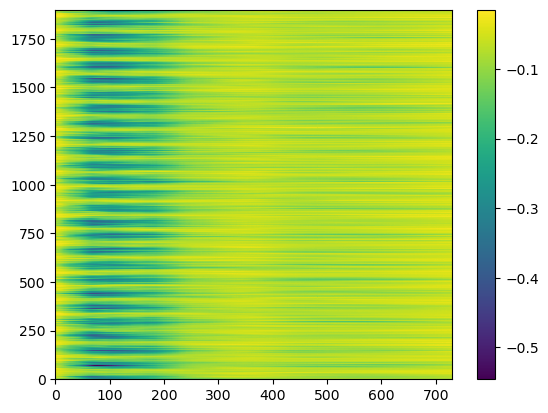

In [45]:
plt.pcolormesh(astd1[bb]*ratioa)
plt.colorbar()

In [12]:
bins = 5
b = slice(None,None,bins)
bb= (b,b)

In [43]:
ratioa

-0.00029818002212416475

In [21]:
ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
vmax = 0.4

CPU times: user 550 ms, sys: 63.8 ms, total: 613 ms
Wall time: 549 ms


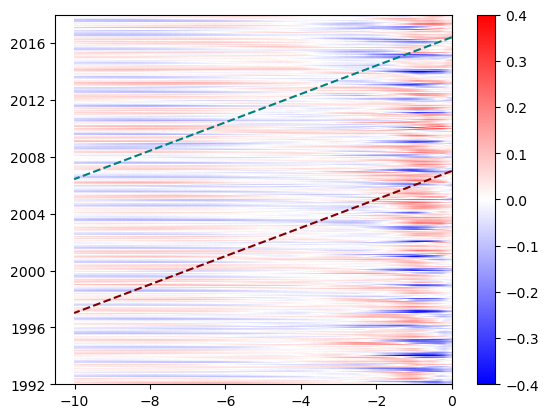

In [29]:
%%time
amean1 = amean1.persist()
plt.pcolormesh(-ptime[b],rtime[b],amean1[bb]*ratioa, cmap = 'bwr',vmax = vmax, vmin = -vmax,linewidth = 0,rasterized = True)
plt.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
plt.plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
plt.colorbar()

CPU times: user 552 ms, sys: 187 ms, total: 738 ms
Wall time: 794 ms


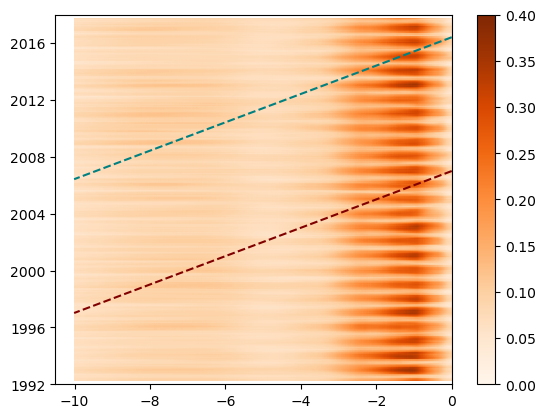

In [48]:
%%time
astd3 = astd3.persist()
plt.pcolormesh(-ptime[b],rtime[b],-astd3[bb]*ratioa, cmap = 'Oranges',vmax = vmax, vmin = 0,linewidth = 0,rasterized = True)
plt.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
plt.plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
plt.colorbar()

CPU times: user 11 s, sys: 3.84 s, total: 14.8 s
Wall time: 3.59 s


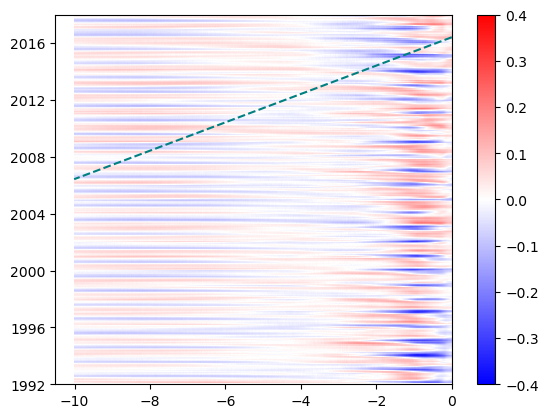

In [25]:
%%time
amean2 = amean2.persist()
plt.pcolormesh(-ptime[b],rtime[b],amean2[bb]*ratioa, cmap = 'bwr',vmax = vmax, vmin = -vmax,linewidth = 0,rasterized = True)
plt.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
plt.colorbar()

CPU times: user 29.1 s, sys: 2.79 s, total: 31.9 s
Wall time: 2.77 s


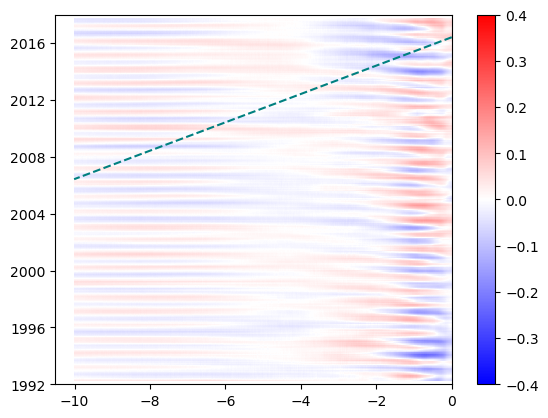

In [26]:
%%time
amean3 = amean3.persist()
plt.pcolormesh(-ptime[b],rtime[b],amean3[bb]*ratioa, cmap = 'bwr',vmax = vmax, vmin = -vmax,linewidth = 0,rasterized = True)
plt.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
plt.colorbar()

CPU times: user 505 ms, sys: 59.7 ms, total: 565 ms
Wall time: 517 ms


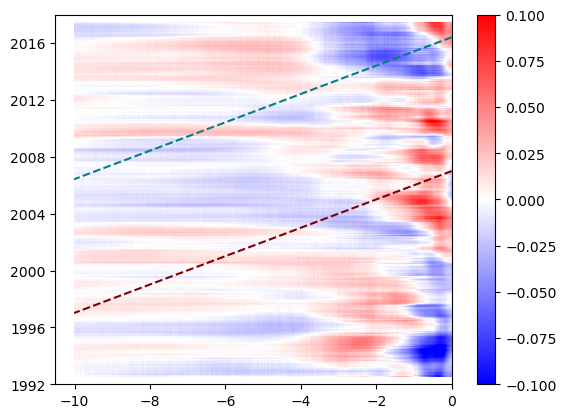

In [49]:
%%time
amean4 = amean4.persist()
plt.pcolormesh(-ptime[b],rtime[b],amean4[bb]*ratioa, cmap = 'bwr',vmax = 0.1, vmin = -0.1,linewidth = 0,rasterized = True)
plt.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
plt.plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
plt.colorbar()

In [50]:
rhs_list

['A', 'F', 'dif_v', 'E', 'dif_h', 'e_ua', 'I']

In [58]:
from dask.diagnostics import ProgressBar

In [72]:
re_roll = False

In [68]:
if re_roll:
    rolled = xr.Dataset()
    rolled['time'] = dsa['time']
    rolled['space'] = dsa['space']
    for var in rhs_list+['sf']:
        rolled[var] = dsa[var].rolling(time = 365,center = True,min_periods = 1).mean().chunk((1825,1825))
    with ProgressBar():
        rolled.to_zarr('/sciserver/filedb08-03/ocean/wenrui_temp/rolled_table_domain_all_N.zarr',mode = 'w')

In [69]:
if re_roll:
    rolled = xr.Dataset()
    rolled['time'] = dsa['time']
    rolled['space'] = dsa['space']
    for var in rhs_list+['sf']:
        rolled[var] = ds4[var].rolling(time = 365,center = True,min_periods = 1).mean().chunk((1825,1825))
    with ProgressBar():
        rolled.to_zarr('/sciserver/filedb08-03/ocean/wenrui_temp/rolled_table_domain4_N.zarr',mode = 'w')

In [73]:
if re_roll:
    rolled = xr.Dataset()
    rolled['time'] = dsa['time']
    rolled['space'] = dsa['space']
    for var in rhs_list+['sf']:
        rolled[var] = dsa[var].rolling(time = 30,center = True,min_periods = 1).mean().chunk((1825,1825))
    with ProgressBar():
        rolled.to_zarr('/sciserver/filedb08-03/ocean/wenrui_temp/roll30_table_domain_all_N.zarr',mode = 'w')

/tmp/ipykernel_2486424/1189770655.py:6: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  rolled[var] = dsa[var].rolling(time = 30,center = True,min_periods = 1).mean().chunk((1825,1825))
/tmp/ipykernel_2486424/1189770655.py:6: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  rolled[var] = dsa[var].rolling(time = 30,center = True,min_periods = 1).mean().chunk((1825,1825))
/tmp/ipykernel_2486424/1189770655.py:6: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  rolled[var] = dsa[var].rolling(time = 30,center = True,min_periods = 1).mean().chunk((1825,1825))
/tmp/ipykernel_2486424/1189770655.py:6: DeprecationWarning: Supplying chunks as dimen

[########################################] | 100% Completed | 65.20 s
